In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import folium

In [2]:
df=pd.read_excel("Tourist Places Delhi (2).xlsx")

In [3]:
df.head()

,S.No,Name,Latitude,Longitude
0,1,Red Fort,28.6562,77.2410
1,2,India Gate,28.6129,77.2295
2,3,Rasthrapati Bhawan,28.6143,77.1994
3,4,Jantar Mantar,28.6271,77.2166
4,5,Humayun's Tomb,28.5933,77.2507


In [4]:
kmeans_1=KMeans(n_clusters=7)
X=df[['Latitude','Longitude']].values
predictions=kmeans_1.fit_predict(X)

In [5]:
clustered=pd.concat([df.reset_index(),pd.DataFrame({'Cluster':predictions})],axis=1)

In [6]:
clustered.head()

,index,S.No,Name,Latitude,Longitude,Cluster
0,0,1,Red Fort,28.6562,77.2410,4
1,1,2,India Gate,28.6129,77.2295,0
2,2,3,Rasthrapati Bhawan,28.6143,77.1994,6
3,3,4,Jantar Mantar,28.6271,77.2166,6
4,4,5,Humayun's Tomb,28.5933,77.2507,5


In [7]:
clustered.drop(['index','S.No'],axis=1,inplace=True)

In [8]:
clustered.sort_values(by=['Cluster'])

,Name,Latitude,Longitude,Cluster
1,India Gate,28.6129,77.2295,0
26,Indian War Memorial Museum,28.6127,77.2330,0
25,India Habitat Center,28.5897,77.2256,0
14,Agrasen Ki Baoli,28.6260,77.2250,0
18,The Educational National Gallery of Modern Art,28.6102,77.2344,0
19,Lodhi Gardens,28.5931,77.2197,0
17,National Museum,28.6118,77.2193,0
15,National Rail Museum,28.5858,77.1798,1
13,Hauz Khas Fort,28.5479,77.2031,1
16,Dilli Haat,28.5733,77.2076,1


In [9]:
conditions = [
    clustered['Cluster'] == 0, 
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    clustered['Cluster'] == 5,
    clustered['Cluster'] == 6
]
choices = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 
           'Sunday']
clustered['Vacation Day'] = np.select(conditions, choices, default='black')



In [10]:
clustered.sort_values(by=['Cluster'])

,Name,Latitude,Longitude,Cluster,Vacation Day
1,India Gate,28.6129,77.2295,0,Monday
26,Indian War Memorial Museum,28.6127,77.2330,0,Monday
25,India Habitat Center,28.5897,77.2256,0,Monday
14,Agrasen Ki Baoli,28.6260,77.2250,0,Monday
18,The Educational National Gallery of Modern Art,28.6102,77.2344,0,Monday
19,Lodhi Gardens,28.5931,77.2197,0,Monday
17,National Museum,28.6118,77.2193,0,Monday
15,National Rail Museum,28.5858,77.1798,1,Tuesday
13,Hauz Khas Fort,28.5479,77.2031,1,Tuesday
16,Dilli Haat,28.5733,77.2076,1,Tuesday


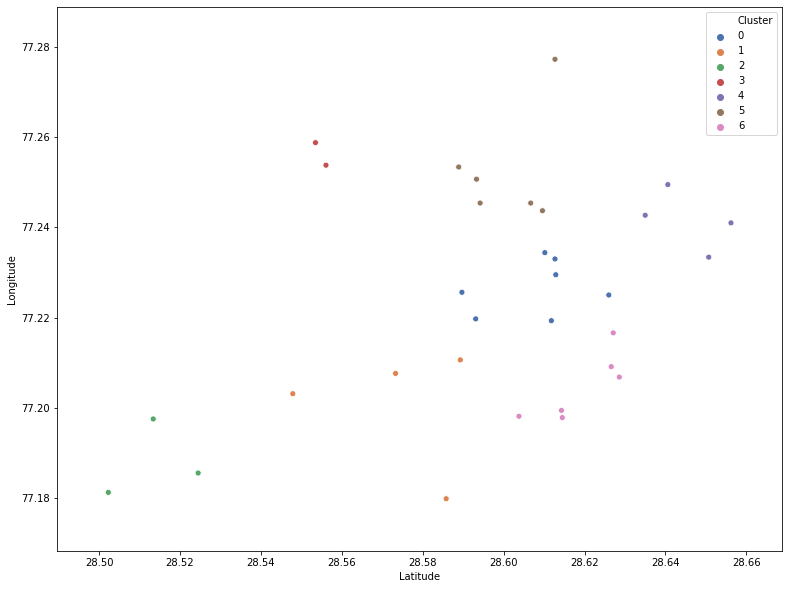

In [11]:
clustered.to_csv('Tourist-Places-Delhi-Clustered.csv')
from matplotlib import pyplot
dims=(13,10)
fig, ax = pyplot.subplots(figsize=dims)

sns.scatterplot(ax=ax,x=clustered['Latitude'],y=clustered['Longitude'],hue=clustered['Cluster'],palette='deep')

In [12]:
colordict = {0: 'gray', 1: 'darkblue', 2: 'orange', 3: 'red', 4: 'darkgreen', 5:'purple', 6:'cadetblue'}
m = folium.Map(location=[77.216721,28.644800], zoom_start=1)
for lat,lon,clust,name,vac_day in zip(clustered['Latitude'], clustered['Longitude'], clustered['Cluster'],clustered['Name']
                                     ,clustered['Vacation Day']):
    folium.CircleMarker([lat,lon],
                        radius=6,
                        popup = ('Place: ' + str(name).capitalize() + '<br>'
                                 'Day: ' + str(vac_day) + '<br>'
                                ),
                        color='b',
                        key_on=clust,
                        fill_color=colordict[clust],
                        fill=True,
                        fill_opacity=0.7).add_to(m)
m